In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [2]:
#Read the data
data = pd.read_csv("C:/Users/krishna/Downloads/50_Startups.csv")
data.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


##no null values

# EDA

In [4]:
# Transformation

In [5]:
data1= pd.get_dummies(data,columns=['State'])

In [6]:
data1.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [7]:
# Rename columns

In [8]:
data1.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit',
       'State_California', 'State_Florida', 'State_New York'],
      dtype='object')

In [9]:
data1 = data1.rename({'R&D Spend':'rd', 'Administration':'admin', 'Marketing Spend':'ms',
       'State_California':'california', 'State_Florida':'florida', 'State_New York':'newyork'},axis=1)

In [10]:
data1.columns

Index(['rd', 'admin', 'ms', 'Profit', 'california', 'florida', 'newyork'], dtype='object')

In [11]:
data1[data1.duplicated()].shape

(0, 7)

##no duplicate values

# correlation

In [12]:
data1.corr()

,rd,admin,ms,Profit,california,florida,newyork
rd,1.000000,0.241955,0.724248,0.972900,-0.143165,0.105711,0.039068
admin,0.241955,1.000000,-0.032154,0.200717,-0.015478,0.010493,0.005145
ms,0.724248,-0.032154,1.000000,0.747766,-0.168875,0.205685,-0.033670
Profit,0.972900,0.200717,0.747766,1.000000,-0.145837,0.116244,0.031368
california,-0.143165,-0.015478,-0.168875,-0.145837,1.000000,-0.492366,-0.515152
florida,0.105711,0.010493,0.205685,0.116244,-0.492366,1.000000,-0.492366
newyork,0.039068,0.005145,-0.033670,0.031368,-0.515152,-0.492366,1.000000


# Building model

In [13]:
model1 = smf.ols('Profit~rd+admin+ms+california+florida+newyork',data=data1).fit()

In [14]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Mon, 28 Jun 2021   Prob (F-statistic):           1.34e-27
Time:                        07:20:44   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.763e+04   5073.636      7.417      0.000    2.74e+04    4.79e+04
rd             0.8060      0.046     17.369      0.000       0.712       0.900
admin         -0.0270      0.052     -0.517      0.608      -0.132       0.078
ms             0.0270      0.017      1.574      0.123      -0.008       0.062
california  1.249e+04   2449.797      5.099      0.000    7554.868    1.74e+04
florida     1.269e+04   2726.700      4.654      0.000    7195.596    1.82e+04
newyork     1.245e+04   2486.364      5.007      0.000    7439.285    1.75e+04
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     3.84e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.63e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [15]:
####p value for admin and ms is > 0.05; hence coefficient of this 2 are not significant, so need to check individually

In [16]:
model11 = smf.ols('Profit~admin',data=data1).fit()

In [17]:
model11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Mon, 28 Jun 2021   Prob (F-statistic):              0.162
Time:                        07:20:45   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
admin          0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
#### admin has insignificant pvalue

In [19]:
model12 = smf.ols('Profit~ms',data=data1).fit()

In [20]:
model12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Mon, 28 Jun 2021   Prob (F-statistic):           4.38e-10
Time:                        07:20:46   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept       6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
ms             0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
#### ms has significant p value

In [22]:
model13 = smf.ols('Profit~admin+ms',data=data1).fit()

In [23]:
model13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Mon, 28 Jun 2021   Prob (F-statistic):           2.50e-10
Time:                        07:20:47   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
admin          0.3237      0.131      2.468      0.017       0.060       0.588
ms             0.2488      0.030      8.281      0.000       0.188       0.309
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
####both taken together has significant p value.

# check collinearity
Variance Inflation Factor

In [25]:
data1.columns

Index(['rd', 'admin', 'ms', 'Profit', 'california', 'florida', 'newyork'], dtype='object')

In [26]:
rsq_rd=smf.ols("rd~admin+ms",data=data1).fit().rsquared
vif_rd=1/(1-rsq_rd)

rsq_admin=smf.ols("admin~rd+ms",data=data1).fit().rsquared
vif_admin=1/(1-rsq_admin)

rsq_ms=smf.ols("ms~rd+admin",data=data1).fit().rsquared
vif_ms=1/(1-rsq_ms)

# Putting the values in Dataframe format
d1={'Variables':['rd','admin','ms'],'Vif':[vif_rd,vif_admin,vif_ms]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,rd,2.468903
1,admin,1.175091
2,ms,2.326773


In [27]:
#### VIF is less than 20 hence no collinearity, so consider all variables

# Residual analysis
Q-Q plot

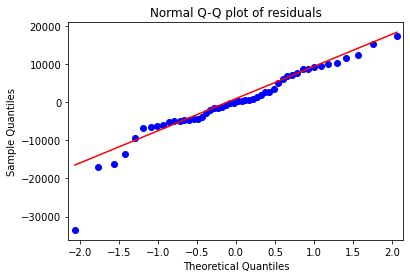

In [28]:
import statsmodels.api as sm
qqplot=sm.qqplot(model1.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [29]:
list(np.where(model1.resid<-30000))

[array([49], dtype=int64)]

# Model deletion diagnostics
Cook's distance

# Iteration-1

In [30]:
model_influence = model1.get_influence()
(c, _) = model_influence.cooks_distance

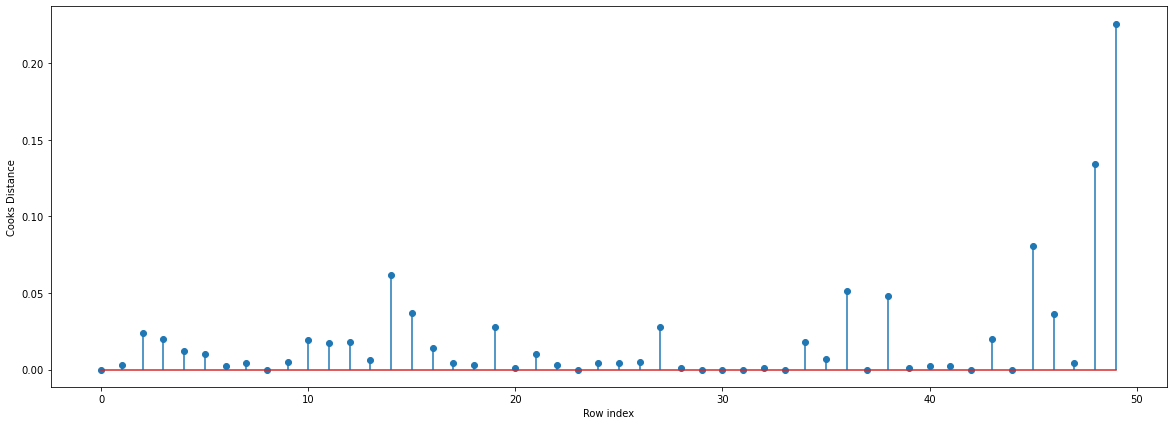

In [31]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [32]:
np.argmax(c) , np.max(c)

(49, 0.22625094501509285)

# High influence points

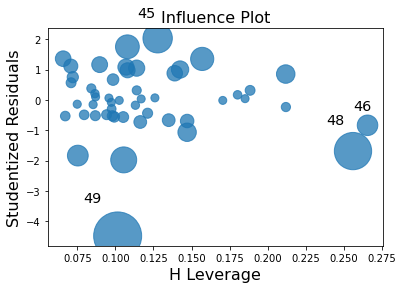

In [33]:
from statsmodels.graphics.regressionplots import influence_plot #Leverage Value using High Influence Points
influence_plot(model1)
plt.show()

In [34]:
k = data1.shape[1] # Leverage Cuttoff Value
n = data1.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.48

# Improving the model
From the above plot, it is evident that data point 49 is the influencers

In [35]:
data1[data1.index.isin([49])]

,rd,admin,ms,Profit,california,florida,newyork
49,0.0,116983.8,45173.06,14681.4,1,0,0


In [36]:
data2=data1.drop(data1.index[[49]],axis=0).reset_index(drop=True)
data2.head()

,rd,admin,ms,Profit,california,florida,newyork
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [37]:
model2 = smf.ols('Profit~rd+admin+ms+california+florida+newyork',data=data2).fit()

In [38]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     216.6
Date:                Mon, 28 Jun 2021   Prob (F-statistic):           2.51e-29
Time:                        07:21:00   Log-Likelihood:                -505.97
No. Observations:                  49   AIC:                             1024.
Df Residuals:                      43   BIC:                             1035.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.915e+04   4249.909      9.213      0.000    3.06e+04    4.77e+04
rd             0.7836      0.039     20.056      0.000       0.705       0.862
admin         -0.0220      0.044     -0.505      0.616      -0.110       0.066
ms             0.0258      0.014      1.804      0.078      -0.003       0.055
california  1.422e+04   2081.663      6.833      0.000       1e+04    1.84e+04
florida     1.266e+04   2276.728      5.561      0.000    8068.684    1.73e+04
newyork     1.227e+04   2076.431      5.909      0.000    8082.828    1.65e+04
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   1.667
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.207
Skew:                           0.061   Prob(JB):                        0.902
Kurtosis:                       2.705   Cond. No.                     6.13e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.03e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [39]:
####R^2 value has increased but ms and admin are still insignificant

# iteration-2

In [40]:
model_influence = model2.get_influence()
(c1, _) = model_influence.cooks_distance

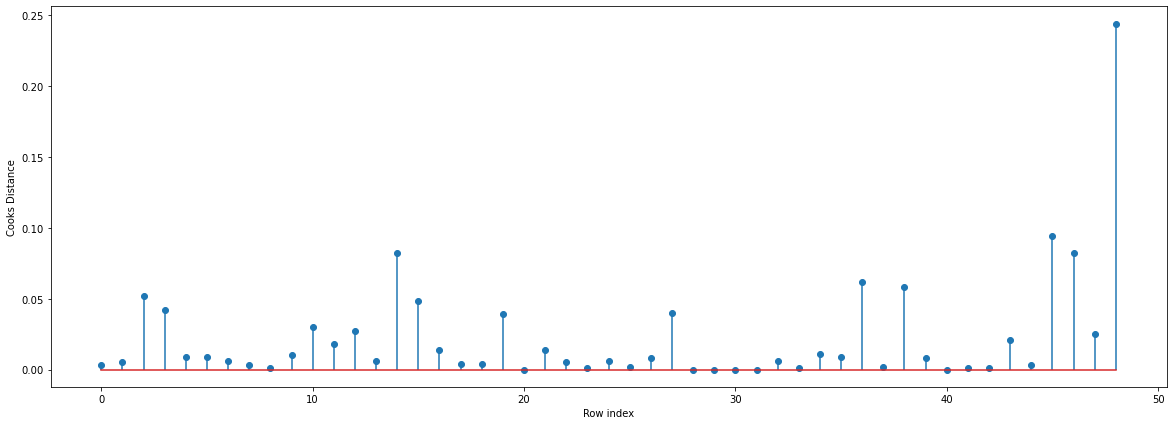

In [41]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data2)), np.round(c1, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [42]:
np.argmax(c1),np.max(c1)

(48, 0.24352817571403917)

From the above plot, it is evident that data point 48 is the influencers

In [43]:
data3=data2.drop(data2.index[[48]],axis=0).reset_index(drop=True)
data3

,rd,admin,ms,Profit,california,florida,newyork
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0


In [44]:
model3= smf.ols('Profit~rd+admin+ms+california+florida+newyork',data=data3).fit()
print(model3.tvalues, '\n', model3.pvalues) 

Intercept      9.647745
rd            21.160088
admin         -1.381309
ms             1.274543
california     7.515783
florida        6.258515
newyork        6.581417
dtype: float64 
 Intercept     3.236978e-12
rd            5.070643e-24
admin         1.744892e-01
ms            2.094776e-01
california    2.683240e-09
florida       1.686412e-07
newyork       5.787699e-08
dtype: float64


In [45]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     217.6
Date:                Mon, 28 Jun 2021   Prob (F-statistic):           7.02e-29
Time:                        07:21:04   Log-Likelihood:                -493.23
No. Observations:                  48   AIC:                             998.5
Df Residuals:                      42   BIC:                             1010.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.409e+04   4569.825      9.648      0.000    3.49e+04    5.33e+04
rd             0.7888      0.037     21.160      0.000       0.714       0.864
admin         -0.0621      0.045     -1.381      0.174      -0.153       0.029
ms             0.0179      0.014      1.275      0.209      -0.010       0.046
california   1.53e+04   2035.915      7.516      0.000    1.12e+04    1.94e+04
florida     1.415e+04   2261.128      6.259      0.000    9588.163    1.87e+04
newyork     1.464e+04   2223.793      6.581      0.000    1.01e+04    1.91e+04
==============================================================================
Omnibus:                        0.267   Durbin-Watson:                   1.835
Prob(Omnibus):                  0.875   Jarque-Bera (JB):                0.453
Skew:                           0.108   Prob(JB):                        0.797
Kurtosis:                       2.576   Cond. No.                     1.39e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is  2e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [46]:
####R^2 value has increased but ms and admin are still insignificant

# iteration-3

In [47]:
model_influence = model3.get_influence()
(c2, _) = model_influence.cooks_distance

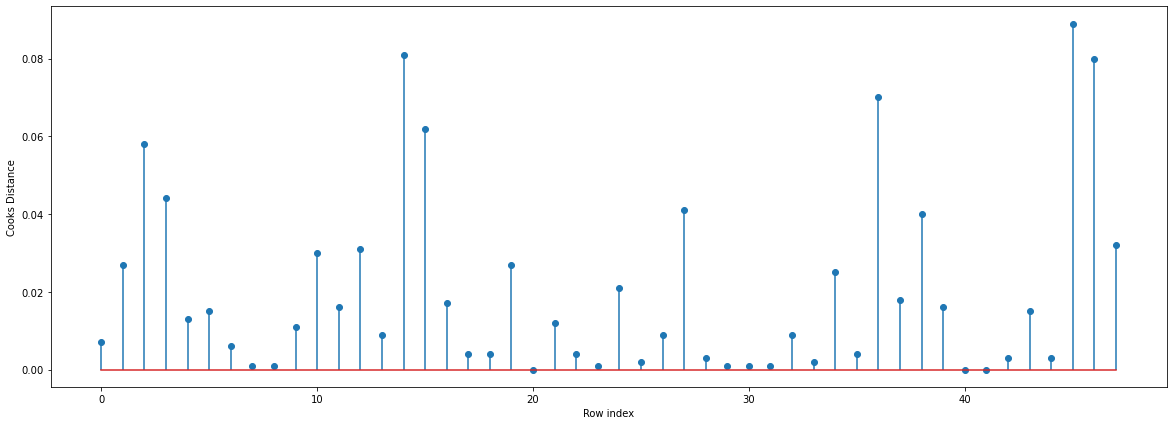

In [48]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data3)), np.round(c2, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [49]:
###Thus most of the points lie in the same range hence there are no more influence points

In [50]:
#checking VIF to see if their's any collinearity in the variables

In [51]:
rsq_rd=smf.ols("rd~admin+ms",data=data3).fit().rsquared
vif_rd=1/(1-rsq_rd)

rsq_admin=smf.ols("admin~rd+ms",data=data3).fit().rsquared
vif_admin=1/(1-rsq_admin)

rsq_ms=smf.ols("ms~rd+admin",data=data3).fit().rsquared
vif_ms=1/(1-rsq_ms)

# Putting the values in Dataframe format
dl={'Variables':['rd','admin','ms'],'Vif':[vif_rd,vif_admin,vif_ms]}
Vif_df=pd.DataFrame(dl)
Vif_df

,Variables,Vif
0,rd,2.250972
1,admin,1.196016
2,ms,2.229867


In [52]:
####VIF is below 10 hence no interdependency

In [53]:
final_model= smf.ols('Profit~rd+ms+california+florida+newyork',data=data3).fit()

In [54]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     265.9
Date:                Mon, 28 Jun 2021   Prob (F-statistic):           1.02e-29
Time:                        07:21:09   Log-Likelihood:                -494.30
No. Observations:                  48   AIC:                             998.6
Df Residuals:                      43   BIC:                             1008.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    3.83e+04   1841.077     20.803      0.000    3.46e+04     4.2e+04
rd             0.7692      0.035     22.072      0.000       0.699       0.840
ms             0.0251      0.013      1.908      0.063      -0.001       0.052
california  1.353e+04   1599.496      8.461      0.000    1.03e+04    1.68e+04
florida     1.216e+04   1761.727      6.904      0.000    8609.549    1.57e+04
newyork      1.26e+04   1685.592      7.478      0.000    9204.975     1.6e+04
==============================================================================
Omnibus:                        0.133   Durbin-Watson:                   1.645
Prob(Omnibus):                  0.936   Jarque-Bera (JB):                0.304
Skew:                           0.097   Prob(JB):                        0.859
Kurtosis:                       2.661   Cond. No.                     1.28e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is  2e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Predict for new values

In [55]:
# say New data for prediction is
newdata=pd.DataFrame({'rd':90000,"admin":820000,"ms":70000,"california":120000,"florida":0,"newyork":0},index=[0])
newdata

,rd,admin,ms,california,florida,newyork
0,90000,820000,70000,120000,0,0


In [56]:
final_model.predict(newdata)

0    1.624050e+09
dtype: float64

In [57]:
    pred_y=final_model.predict(data3)
    pred_y

0     189954.096920
1     188065.126405
2     178747.465560
3     171591.396337
4     168979.029495
5     161468.298005
6     158592.204959
7     158831.968791
8     151461.337547
9     154371.120059
10    134616.539494
11    135549.717798
12    128944.644601
13    128946.614482
14    149173.328015
15    145578.625187
16    118487.089716
17    130819.746089
18    128451.306038
19    117379.789551
20    117996.552085
21    118737.731630
22    115005.230705
23    110070.931686
24    113701.653619
25    105042.103171
26    111776.422711
27    115249.148209
28    104240.328944
29    104062.338194
30    100440.395600
31    100148.981556
32    101766.407968
33     98544.749536
34     92843.507659
35     91465.268992
36     77566.801103
37     90685.013556
38     71122.193842
39     85891.685635
40     78294.697002
41     76052.370966
42     73738.056143
43     63724.471569
44     69604.293631
45     51721.102756
46     58942.876754
47     51832.389729
dtype: float64

# R^2 value for each prepared model

In [58]:
data4={'Prep_Models':['Model','Final_Model'],'Rsquared':[model1.rsquared,final_model.rsquared]}
table=pd.DataFrame(data4)
table

,Prep_Models,Rsquared
0,Model,0.950752
1,Final_Model,0.961149
